Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [62]:
# cell for imports. All imports must go here.
import pandas as pd
import matplotlib.pyplot as plt

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [63]:
titanic_df = pd.read_csv('/train.csv')

print("Information about each column:")
print(titanic_df.info())

Information about each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [64]:
print("The first few lines of the dataframe:")
print(titanic_df.head())

The first few lines of the dataframe:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0         

# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

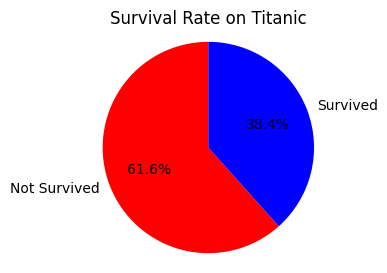

In [65]:
survived_counter = titanic_df['Survived'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(survived_counter, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['red', 'blue'])
plt.title('Survival Rate on Titanic')
plt.axis('equal')
plt.show()

Pie chart відображає, що більшість пасажирів Титаніка вижили, становлячи близько 60% від усієї кількості. Загиблих пасажирів було близько 40% від загальної кількості.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


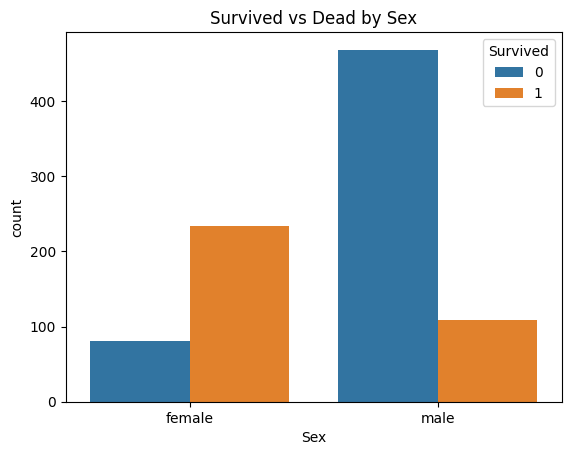

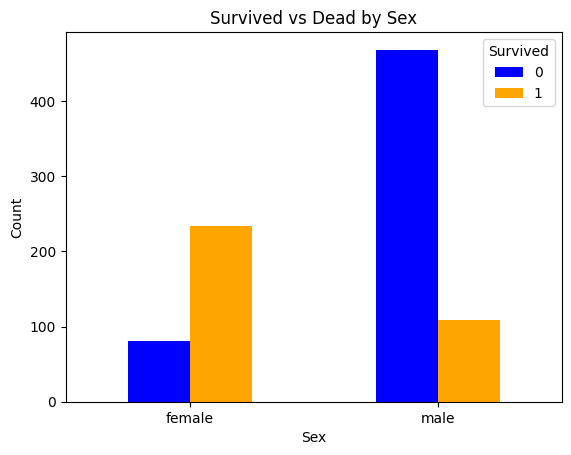

In [66]:
survivor_sex = titanic_df.groupby(['Sex', 'Survived']).size()

survivor_sex.unstack().plot(kind='bar', stacked=False, color=['blue', 'orange'])

plt.title('Survived vs Dead by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['0', '1'])

plt.show()


Для жінок видно, що більше половини вижили, в той час як для чоловіків кількість загиблих перевищує кількість виживших, що вказує на те, що жінкам надавали перевагу під час евакуації.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.



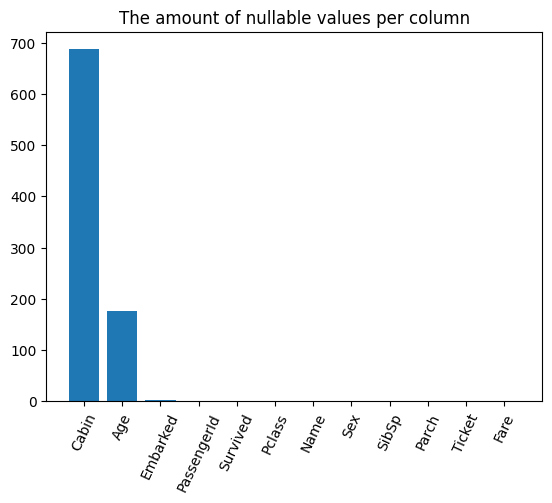

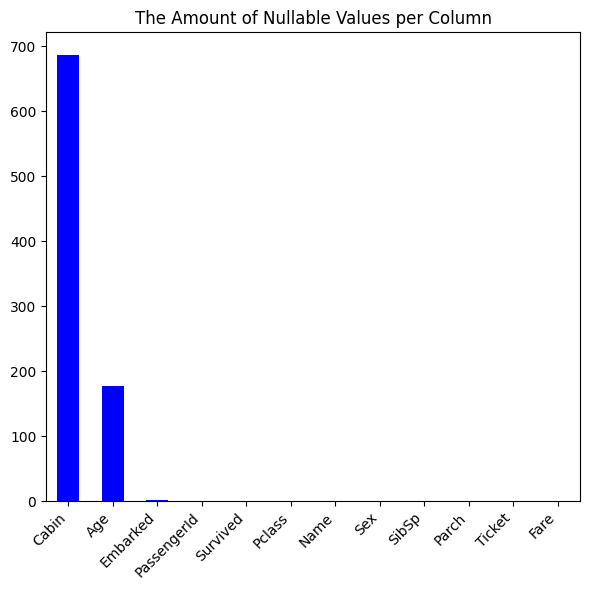

In [67]:
null_values = titanic_df.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(6, 6))
null_values.plot.bar(color='blue')
plt.title('The Amount of Nullable Values per Column')
plt.xticks(range(len(null_values)), null_values.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()


Графік демонструє, які змінні мають найбільшу кількість пропущених значень, що дозволяє швидко визначити обсяг пропущених даних.

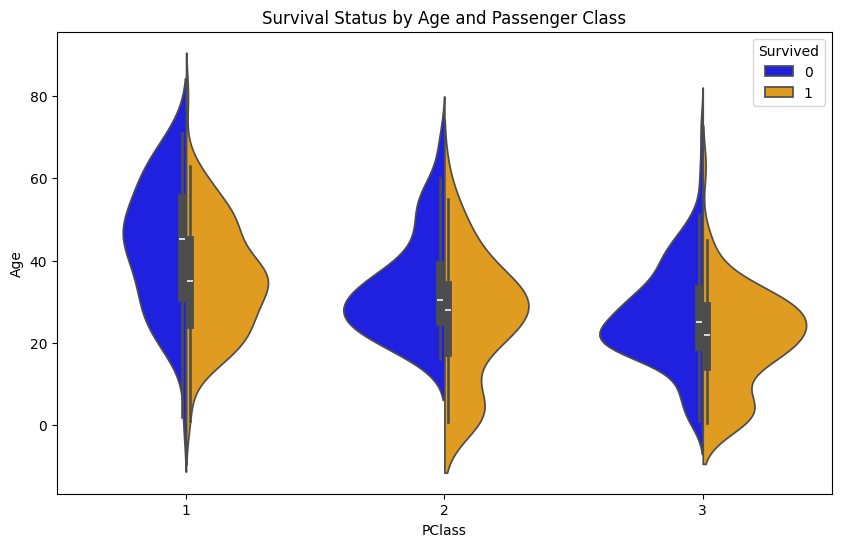

In [69]:
plt.figure(figsize=(10, 6))
violin_plot = sns.violinplot(x='Pclass', y='Age', hue='Survived', data=titanic_df, split=True, palette={0: 'blue', 1: 'orange'})
plt.title('Survival Status by Age and Passenger Class')
plt.ylabel('Age')
plt.xlabel('PClass')
handles, labels = violin_plot.get_legend_handles_labels()
plt.legend(handles=handles, title='Survived', labels=['0', '1'])
plt.show()


На графіку видно співвідношення виживших до загиблих  в залежності від віку пасажирів та їх класу. Можна помітити, що зі зниженням класу співвідноження погиблиз до виживших зростає.





6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


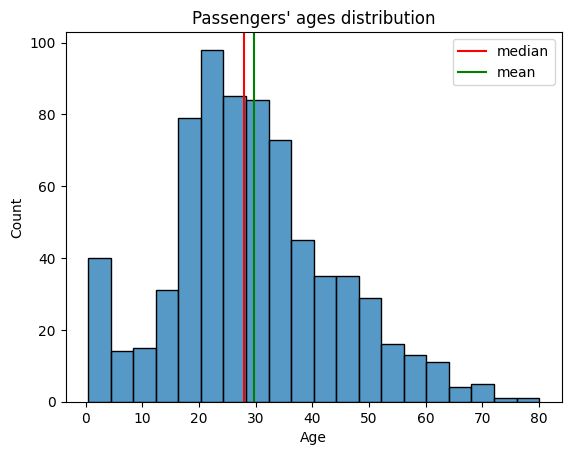

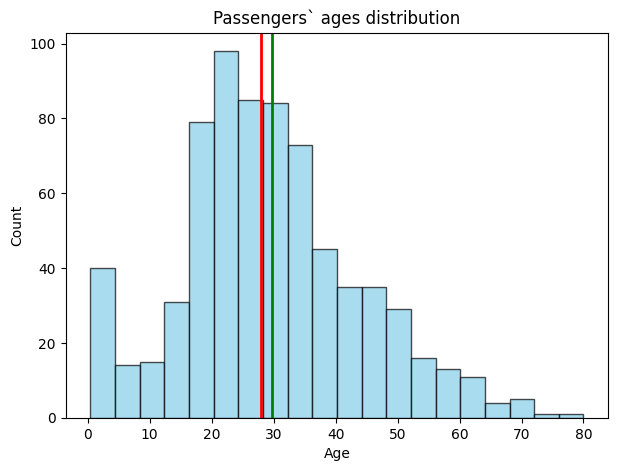

In [70]:
plt.figure(figsize=(7, 5))
plt.hist(titanic_df['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
mean_age = titanic_df['Age'].mean()
median_age = titanic_df['Age'].median()
plt.axvline(median_age, color='red', linewidth=2, label='median')
plt.axvline(mean_age, color='green', linewidth=2, label='mean')
plt.title('Passengers` ages distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

На діграмі відображена кількість пасажирів у залежності від їх віку. Червоним та зеленим лініями позначені середнє та медіанне значення віку відповідно, обчислені з наявних даних.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Співвідношення кількості чоловіків і жінок, при покупці критків різних класів  на корабель "Титанік".

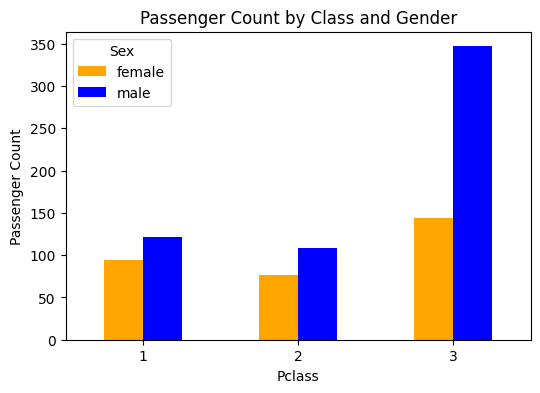

In [71]:
passenger_class_sex = titanic_df.groupby(['Pclass', 'Sex']).size().unstack()
passenger_class_sex.plot(kind='bar', stacked=False, color=['orange', 'blue'], figsize=(6, 4))

plt.title('Passenger Count by Class and Gender')
plt.xlabel('Pclass')
plt.ylabel('Passenger Count')
plt.xticks(rotation=0)
plt.legend(title='Sex')
plt.show()


Графік порівнює кількість чоловіків та жінок у кожному класі квитка. За його результатами видно, що у кожному класі кількість чоловіків перевищує кількість жінок, проте співвідношення чоловіків до жінок в кожному класі є приблизно однаковим, крім 3 класу. Можна побачити, що третій клас має найбільшу кількість пасажирів серед усіх класів, як у чоловіків, так і у жінок.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

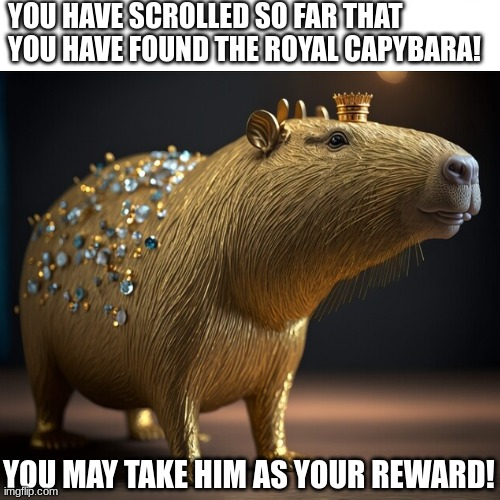